# 1. 데이터 불러오기

In [1]:
# uv add yfinance 
import yfinance as yf 
from datetime import date, timedelta 

year = 5
today = date.today()
end_date = today.strftime("%Y-%m-%d")
start_date = today - timedelta(days=365*year)

print(start_date, end_date)

data = yf.download(
    tickers = "009450.KS",
    start = start_date,
    end = end_date
)
data.head()

2020-09-10 2025-09-09


C:\Users\user\AppData\Local\Temp\ipykernel_10392\4076130856.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,009450.KS,009450.KS,009450.KS,009450.KS,009450.KS
Date,,,,,
2020-09-10,57102.957031,58816.045742,55009.181940,55389.868320,384979
2020-09-11,57293.300781,58054.673549,55389.868862,56531.928013,153445
2020-09-14,55865.726562,57293.300495,55580.211776,57293.300495,125104
2020-09-15,56246.414062,56531.928855,54438.153712,55865.727673,107441
2020-09-16,55865.726562,58530.531237,54533.324225,56246.412945,234832


In [2]:
# 멀티컬럼 제거하기 
data.columns = data.columns.droplevel(1)
data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-09-10,57102.957031,58816.045742,55009.181940,55389.868320,384979
2020-09-11,57293.300781,58054.673549,55389.868862,56531.928013,153445
2020-09-14,55865.726562,57293.300495,55580.211776,57293.300495,125104
2020-09-15,56246.414062,56531.928855,54438.153712,55865.727673,107441
2020-09-16,55865.726562,58530.531237,54533.324225,56246.412945,234832


In [3]:
data = data[["Close"]]
data.head()

Price,Close
Date,
2020-09-10,57102.957031
2020-09-11,57293.300781
2020-09-14,55865.726562
2020-09-15,56246.414062
2020-09-16,55865.726562


In [4]:
# scikit-learn pandas matplotlib 
# CUDA를 사용하기 위한 torch 설치 *

In [5]:
import torch
print(torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

2.8.0+cpu
cpu


# 2. 데이터 분할

In [6]:
N = len(data)
test_ratio = 0.2 
val_ratio = 0.1

test_size = int(N * test_ratio)
val_size = int(N * val_ratio)
train_size = N - val_size - test_size

train_data = data.iloc[:train_size]
val_data = data.iloc[train_size:(train_size+val_size)]
test_data = data.iloc[(train_size+val_size):]

print(f"Train Data: {train_data.shape}, Val Data: {val_data.shape}, Test Data: {test_data.shape}")

Train Data: (857, 1), Val Data: (122, 1), Test Data: (244, 1)


# 3. 데이터 스케일러 적용

In [7]:
from sklearn.preprocessing import MinMaxScaler
# 질문1. MinMaxScaler는 무엇일까? 
# 질문2. 스케일러를 사용할 때 반드시 주의해야할 점은 무엇일까?
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.values)
val_scaled = scaler.transform(val_data.values)
test_scaled = scaler.transform(test_data.values)

print(f"train_scaled: {train_scaled.dtype}")
print(f"val_scaled: {val_scaled.dtype}")
print(f"test_scaled: {test_scaled.dtype}")

print(f"Scale 범위: {scaler.data_min_}, {scaler.data_max_}")


train_scaled: float64
val_scaled: float64
test_scaled: float64
Scale 범위: [32080.44335938], [74072.0234375]


In [8]:
train_scaled

array([[0.5958936 ],
       [0.6004265 ],
       [0.56642982],
       [0.57549563],
       [0.56642982],
       [0.51430153],
       [0.51656808],
       [0.47577204],
       [0.45764053],
       [0.47350569],
       [0.43724256],
       [0.38058146],
       [0.43950892],
       [0.4304432 ],
       [0.48483785],
       [0.4916373 ],
       [0.48483785],
       [0.51203517],
       [0.51883453],
       [0.51883453],
       [0.4871043 ],
       [0.47803859],
       [0.45764053],
       [0.45990689],
       [0.46670624],
       [0.48937066],
       [0.46670624],
       [0.46443979],
       [0.41457804],
       [0.4213774 ],
       [0.43950892],
       [0.43724256],
       [0.43724256],
       [0.44404191],
       [0.44404191],
       [0.43270956],
       [0.44177537],
       [0.45990689],
       [0.50070301],
       [0.56642982],
       [0.52790024],
       [0.48937066],
       [0.48937066],
       [0.4871043 ],
       [0.46670624],
       [0.46897269],
       [0.4871043 ],
       [0.487

# 4. 학습 데이터

In [9]:
print(f"Train Data: {train_scaled.shape}, Val Data: {val_scaled.shape}, Test Data: {test_scaled.shape}")

Train Data: (857, 1), Val Data: (122, 1), Test Data: (244, 1)


In [10]:
print(train_scaled.shape)

(857, 1)


In [11]:
# 데이터 움직이는 패턴 파악하기
window = 7
for i in range(0, 14 - window): # 14 - 7 = 7
    print(i, i + window)           

0 7
1 8
2 9
3 10
4 11
5 12
6 13


In [12]:
print(val_scaled[0])
print(val_scaled[0, [-1]])

[0.5005178]
[0.5005178]


In [13]:
import numpy as np 
test_data = np.array([[1.0, 2.0]])
print(test_data[0])
print(test_data[0, [-1]])

[1. 2.]
[2.]


In [14]:
# Train Data: (857, 1), Val Data: (122, 1), Test Data: (244, 1)
len(np.concatenate([train_scaled[-window:], val_scaled]))

129

In [15]:
import numpy as np 
# 질문 1. Window가 무엇을 의미하는지 설명할 수 있다. 
# 질문 2. train data가 몇 개 나오는지 설명할 수 있다. 
def make_dataset(data, window):
    dataX = []
    datay = []

    for i in range(0, data.shape[0] - window):
        # print(i,i+window)
        x = data[i:(i+window), :]
        y = data[(i+window), [-1]]

        dataX.append(x)
        datay.append(y)
    # print("==============")
    return np.array(dataX), np.array(datay)

window = 60

X_train, y_train = make_dataset(train_scaled, window=window)
# val_scaled의 X, y를 만들기 위해서는 train_scaled에서 맨 뒤에서 window만큼 가져와야 한다. 
X_val, y_val = make_dataset(np.concatenate([train_scaled[-window:], val_scaled]), window=window)
X_test, y_test = make_dataset(np.concatenate([val_scaled[-window:], test_scaled]), window=window)

print(train_scaled.shape, X_train.shape, y_train.shape)
print(val_scaled.shape, X_val.shape, y_val.shape)
print(test_scaled.shape, X_test.shape, y_test.shape)

(857, 1) (797, 60, 1) (797, 1)
(122, 1) (122, 60, 1) (122, 1)
(244, 1) (244, 60, 1) (244, 1)


In [16]:
X_train[0].shape

(60, 1)

In [17]:
import numpy as np

a = np.array([[1, 2], [3, 4]])
b = np.array([[7, 8], [9, 10], [11, 12]])

print(np.concatenate((a, b), axis=0))

[[ 1  2]
 [ 3  4]
 [ 7  8]
 [ 9 10]
 [11 12]]


# 5. DataLoader 만들기

In [18]:
import torch 

X_train_ts = torch.FloatTensor(X_train)
y_train_ts = torch.FloatTensor(y_train)
X_val_ts = torch.FloatTensor(X_val)
y_val_ts = torch.FloatTensor(y_val)
X_test_ts = torch.FloatTensor(X_test)
y_test_ts = torch.FloatTensor(y_test)

In [19]:
from torch.utils.data import TensorDataset, DataLoader 

train_dataset = TensorDataset(X_train_ts, y_train_ts)
print(len(train_dataset))
# print(train_dataset[0])

val_dataset = TensorDataset(X_val_ts, y_val_ts)
print(len(val_dataset))
# print(val_dataset[0])

test_dataset = TensorDataset(X_test_ts, y_test_ts)
print(len(test_dataset))
# print(test_dataset[0])


797
122
244


In [20]:
# 질문1. DataLoader가 뭔가요?
batch_size = 50

train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# 5. 모델 만들기

In [21]:
import torch.nn as nn 

class LSTMRegressor(nn.Module):

    def __init__(self,input_size, hidden_size, num_layers, dropout):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers = num_layers,
            batch_first = True,
            dropout = dropout if num_layers > 1 else 0
        )
        self.fc = nn.Linear(hidden_size,1)

    def forward(self,x):
        # out : 모든 시점의 hidden 
        # hn : "마지막 시점"의 요약 정보
        # cn : 마지막 시적의 셀 상태 
        out, (hn,cn) = self.lstm(x)
        pred = self.fc(hn[-1])
        return pred


In [22]:
# 모델 만들기
model = LSTMRegressor(input_size=1, hidden_size=128, num_layers=2, dropout=0.2)
model

LSTMRegressor(
  (lstm): LSTM(1, 128, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

# 6. 학습하기

In [23]:
# 정의
lr  = 1e-5
criterion = nn.MSELoss() # 손실함수
optimizer = torch.optim.Adam(model.parameters(), lr=lr) # 최적화 함수
epochs = 100 # epoch

In [24]:
# 학습 
best_val_loss = float("inf")
patience = 0
loss_history = []
for epoch in range(epochs):
    # Train
    model.train()

    train_loss_history = []
    for data, target in train_dataloader:
        # 데이터 GPU 보내기
        data = data.to(device)
        target = target.to(device)
        # print(data.shape, target.shape)

        optimizer.zero_grad() # 초기화
        pred = model(data) # 예측
        loss = criterion(pred, target) # 손실 계산
        loss.backward() # 역전파
        optimizer.step() # 최적화함수 업데이트

        # 손실 저장
        train_loss_history.append(loss.item())

    # Validation 
    model.eval()

    val_loss_history = []
    with torch.no_grad():
        for data, target in val_dataloader:
            data = data.to(device)
            target = target.to(device)

            pred = model(data)
            loss = criterion(pred, target)
            val_loss_history.append(loss.item())
    
    # 출력
    train_loss = float(np.mean(train_loss_history))
    val_loss = float(np.mean(val_loss_history))

    loss_history.append(train_loss)
    print(f"Epoch: {epoch}, train_loss={train_loss:.4f}, val_loss={val_loss:.4f}")

    # 학습 끝내는 조건
    if val_loss < best_val_loss:
        best_val_loss = val_loss 
        patience = 0
        torch.save(model.state_dict(), "best.pth")
    else:
        patience += 1
        if patience >= 10:
            break

# 학습 저장
torch.save(model.state_dict(), "last.pt")

Epoch: 0, train_loss=0.1454, val_loss=0.3181
Epoch: 1, train_loss=0.1423, val_loss=0.3127
Epoch: 2, train_loss=0.1393, val_loss=0.3073
Epoch: 3, train_loss=0.1365, val_loss=0.3019
Epoch: 4, train_loss=0.1336, val_loss=0.2967
Epoch: 5, train_loss=0.1309, val_loss=0.2915
Epoch: 6, train_loss=0.1281, val_loss=0.2863
Epoch: 7, train_loss=0.1255, val_loss=0.2812
Epoch: 8, train_loss=0.1228, val_loss=0.2762
Epoch: 9, train_loss=0.1203, val_loss=0.2711
Epoch: 10, train_loss=0.1176, val_loss=0.2661
Epoch: 11, train_loss=0.1151, val_loss=0.2611
Epoch: 12, train_loss=0.1125, val_loss=0.2561
Epoch: 13, train_loss=0.1100, val_loss=0.2510
Epoch: 14, train_loss=0.1076, val_loss=0.2460
Epoch: 15, train_loss=0.1051, val_loss=0.2409
Epoch: 16, train_loss=0.1027, val_loss=0.2358
Epoch: 17, train_loss=0.1004, val_loss=0.2307
Epoch: 18, train_loss=0.0980, val_loss=0.2255
Epoch: 19, train_loss=0.0955, val_loss=0.2203
Epoch: 20, train_loss=0.0932, val_loss=0.2151
Epoch: 21, train_loss=0.0908, val_loss=0.209

## 7. 시각화

Text(0, 0.5, 'loss')

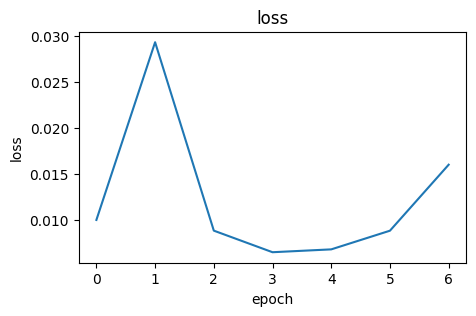

In [62]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(5,3))
plt.plot(loss_history)
plt.title("loss")
plt.xlabel("epoch")
plt.ylabel("loss")

## 8. 예측하기

In [ ]:
# Validation 
model.eval()

test_loss_history = []
with torch.no_grad():
    for data, target in test_dataloader:
        data = data.to(device)
        target = target.to(device)

        pred = model(data)
        loss = criterion(pred, target)
        test_loss_history.append(loss.item())

print(float(np.mean(test_loss_history)))

0.016013071210181806


c:\PythonProject\poten_up09\.venv\Lib\site-packages\torch\nn\modules\loss.py:616: UserWarning: Using a target size (torch.Size([50, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\PythonProject\poten_up09\.venv\Lib\site-packages\torch\nn\modules\loss.py:616: UserWarning: Using a target size (torch.Size([44, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## 9. 예측 시각화

In [25]:
X_test_ts = torch.FloatTensor(X_test)
y_test_ts = torch.FloatTensor(y_test)

# 예측값 저장
pred_history = []
for i in range(len(X_test_ts)):
    with torch.no_grad():
        data = X_test_ts[i].to(device)
        pred = model(data.unsqueeze(dim=0))
        print(pred.item())
        pred_history.append(pred.item())

0.5443708300590515
0.5440411567687988
0.5419105291366577
0.5394266843795776
0.5370805263519287
0.5351720452308655
0.5340359807014465
0.5336077809333801
0.5340901017189026
0.5352636575698853
0.5369545221328735
0.5393586754798889
0.5418365001678467
0.5436769723892212
0.5457774996757507
0.5484834313392639
0.5509836673736572
0.5534838438034058
0.5556926131248474
0.5574326515197754
0.5588780641555786
0.5619401931762695
0.5669006705284119
0.5730936527252197
0.5817096829414368
0.592652440071106
0.6054180860519409
0.6184474229812622
0.6312522888183594
0.6429064273834229
0.6549912691116333
0.6664295196533203
0.6768994331359863
0.6852744817733765
0.6917572021484375
0.6962064504623413
0.699781060218811
0.7025725245475769
0.7048662900924683
0.7062154412269592
0.7078619599342346
0.709464430809021
0.7103044986724854
0.7112170457839966
0.7137157917022705
0.7158250212669373
0.7187166810035706
0.7218688726425171
0.7232668399810791
0.7225819826126099
0.7209780812263489
0.7178977727890015
0.7130271196365